# Recommendation System - Movie Recommendation
## This notebook outlines the concepts involved in building a Complete Recommendation System for recommending Movies to users
## Movie Recommender System - A very very very simple Clone of Netflix

**MovieLens dataset** and build a model to **recommend movies** to the end users. This data has been collected by the GroupLens Research Project at the University of Minnesota. 

This dataset consists of:
- **100,000 ratings** (1-5) from **943 users** on **1682 movies**
- Demographic information of the users (age, gender, occupation, etc.)

Dataset: 

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Download the dataset

In [2]:
!python -m wget https://raw.githubusercontent.com/subashgandyer/datasets/main/ml-100k/ml-100k.zip


Saved under ml-100k.zip


In [4]:
!python -m unzip ml-100k.zip

### Load the dataset
### Reading users file
- u.user

- Please check the column names from the readme file
- Pass in column names for each CSV as the column name is not given in the file and read them using pandas
- Use these following columns
    - 'user_id', 'age', 'sex', 'occupation', 'zip_code'

In [2]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,encoding='latin-1')

### Display the user data

In [3]:
print("\nUser Data :")
print("shape : ", users.shape)
print(users.head())


User Data :
shape :  (943, 5)
   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213


In [4]:
users

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


### Reading ratings file
- u.data
- Use the following columns
    - 'user_id', 'movie_id', 'rating', 'unix_timestamp'

In [5]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,encoding='latin-1')

### Display the Ratings data

In [6]:
print("\nRatings Data :")
print("shape : ", ratings.shape)
print(ratings.head())


Ratings Data :
shape :  (100000, 4)
   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596


### Reading items file
- u.item
- Use the following columns
    - 'movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
    - 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
    - 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'

In [7]:
i_cols = ['movie_id', 'movie_title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
items = pd.read_csv('ml-100k/u.item', sep='|', names=i_cols,encoding='latin-1')

### Display the Items data

In [8]:
print("\nItem Data :")
print("shape : ", items.shape)
print(items.head())


Item Data :
shape :  (1682, 24)
   movie_id        movie_title release date  video release date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1           1  ...    

### Reading Training and Testing Ratings data
- Training
    - ua.base
- Testing
    - ua.test
- Use the following columns
    - 'user_id', 'movie_id', 'rating', 'unix_timestamp'

In [9]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_train = pd.read_csv('ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')

### Display the Training and Testing Ratings data

In [10]:
ratings_train.shape, ratings_test.shape

((90570, 4), (9430, 4))

### How many unique users?

In [11]:
n_users = ratings.user_id.unique().shape[0]
n_users

943

### How many unique items / movies?

In [12]:
n_items = ratings.movie_id.unique().shape[0]
n_items

1682

### Create a User-Item Matrix

In [13]:
from scipy.sparse import csr_matrix

In [14]:
user_movies_data = ratings.pivot(index = 'movie_id', columns = 'user_id', values = 'rating').fillna(0)

In [15]:
user_movies_data

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. Content Filtering

### Data Preparation
Prepare data for Metadata to have a TF-IDF Vectorizer for Content Filtering

In [16]:
items

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
items['metadata'] = ""

In [18]:
items

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,metadata
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,


In [19]:
items.Action, type(items.Action)

(0       0
 1       1
 2       0
 3       1
 4       0
        ..
 1677    0
 1678    0
 1679    0
 1680    0
 1681    0
 Name: Action, Length: 1682, dtype: int64,
 pandas.core.series.Series)

In [20]:
def metadata_Action(x):
    if x == 1:
        return "Action"
    else:
        return " "

In [21]:
items['metadata_Action'] = items.Action.apply(metadata_Action)

In [22]:
items

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,metadata,metadata_Action
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,,
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,1,0,0,,Action
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,,
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,,Action
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,1,0,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,,
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,1,0,1,0,0,,
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,1,0,0,0,0,,
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,,


In [23]:
def metadata_Adventure(x):
    if x == 1:
        return " Adventure "
    else:
        return " "
    
items['metadata_Adventure'] = items.Adventure.apply(metadata_Adventure)

In [24]:
items

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,metadata,metadata_Action,metadata_Adventure
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,,,
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,1,0,0,,Action,Adventure
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,1,0,0,,,
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,,Action,
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,1,0,0,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,,,
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,1,0,1,0,0,,,
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,1,0,0,0,0,,,
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,,,


In [25]:
genres = ['Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [26]:
def metadata_Animation(x):
    if x == 1:
        return " Animation "
    else:
        return " "
items['metadata_Animation'] = items.Animation.apply(metadata_Animation)

In [27]:
def metadata_Childrens(x):
    if x == 1:
        return " Children's "
    else:
        return " "
    
items["metadata_Children's"] = items["Children's"].apply(metadata_Childrens)

In [28]:
def metadata_Comedy(x):
    if x == 1:
        return " Comedy "
    else:
        return " "

items['metadata_Comedy'] = items.Comedy.apply(metadata_Comedy)

In [29]:
def metadata_Crime(x):
    if x == 1:
        return " Crime "
    else:
        return " "
    
items['metadata_Crime'] = items.Crime.apply(metadata_Crime)

In [30]:
def metadata_Documentary(x):
    if x == 1:
        return " Documentary "
    else:
        return " "
    
items['metadata_Documentary'] = items.Documentary.apply(metadata_Documentary)

In [31]:
def metadata_Drama(x):
    if x == 1:
        return " Drama "
    else:
        return " "
    
items['metadata_Drama'] = items.Drama.apply(metadata_Drama)

In [32]:
def metadata_Fantasy(x):
    if x == 1:
        return " Fantasy "
    else:
        return " "
    
items['metadata_Fantasy'] = items.Fantasy.apply(metadata_Fantasy)

In [33]:
def metadata_FilmNoir(x):
    if x == 1:
        return " Film-Noir "
    else:
        return " "
    
items['metadata_Film-Noir'] = items["Film-Noir"].apply(metadata_FilmNoir)

In [34]:
def metadata_Horror(x):
    if x == 1:
        return "Horror "
    else:
        return " "

items['metadata_Horror'] = items.Horror.apply(metadata_Horror)

In [35]:
def metadata_Musical(x):
    if x == 1:
        return " Musical "
    else:
        return " "
    
items['metadata_Musical'] = items.Musical.apply(metadata_Musical)

In [36]:
def metadata_Mystery(x):
    if x == 1:
        return " Mystery "
    else:
        return " "
    
items['metadata_Mystery'] = items.Mystery.apply(metadata_Mystery)

In [37]:
def metadata_Romance(x):
    if x == 1:
        return " Romance "
    else:
        return " "
    
items['metadata_Romance'] = items.Romance.apply(metadata_Romance)

In [38]:
def metadata_SciFi(x):
    if x == 1:
        return " Sci-Fi "
    else:
        return " "
    
items['metadata_Sci-Fi'] = items["Sci-Fi"].apply(metadata_SciFi)

In [39]:
def metadata_Thriller(x):
    if x == 1:
        return " Thriller "
    else:
        return " "
    
items['metadata_Thriller'] = items.Thriller.apply(metadata_Thriller)

In [40]:
def metadata_War(x):
    if x == 1:
        return " War "
    else:
        return " "
    
items['metadata_War'] = items.War.apply(metadata_War)

In [41]:
def metadata_Western(x):
    if x == 1:
        return " Western "
    else:
        return " "
    
items['metadata_Western'] = items.Western.apply(metadata_Western)

In [42]:
items

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,metadata_Fantasy,metadata_Film-Noir,metadata_Horror,metadata_Musical,metadata_Mystery,metadata_Romance,metadata_Sci-Fi,metadata_Thriller,metadata_War,metadata_Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,,,,,,,,,,
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,,,,,,,,Thriller,,
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,,,,,,,,Thriller,,
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,,,,,,,,,,
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,,,,,,,,Thriller,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,,,,,,,,,,
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,,,,,,Romance,,Thriller,,
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,,,,,,Romance,,,,
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,,,,,,,,,,


In [43]:
items['full_metadata'] = items[['metadata_Action', 'metadata_Adventure',
'metadata_Animation', 'metadata_Children\'s', 'metadata_Comedy', 'metadata_Crime', 'metadata_Documentary', 'metadata_Drama', 'metadata_Fantasy',
'metadata_Film-Noir', 'metadata_Horror', 'metadata_Musical', 'metadata_Mystery', 'metadata_Romance', 'metadata_Sci-Fi', 'metadata_Thriller', 'metadata_War', 'metadata_Western']].apply(
                                          lambda x: ' '.join(x), axis = 1)
                                
                                

In [44]:
items

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,metadata_Film-Noir,metadata_Horror,metadata_Musical,metadata_Mystery,metadata_Romance,metadata_Sci-Fi,metadata_Thriller,metadata_War,metadata_Western,full_metadata
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,,,,,,,,,,Animation Children's Comedy ...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,,,,,,,Thriller,,,Action Adventure ...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,,,,,,,Thriller,,,Thriller
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,,,,,,,,,,Action Comedy Drama ...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,,,,,,,Thriller,,,Crime Drama Thr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,,,,,,,,,,Drama
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,,,,,Romance,,Thriller,,,Romance Thrille...
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,,,,,Romance,,,,,Drama Romance
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,,,,,,,,,,Comedy


## TF-IDF Vectorizer on Metadata

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(items['full_metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=items.index.tolist())
print(tfidf_df.shape)

(1682, 20)


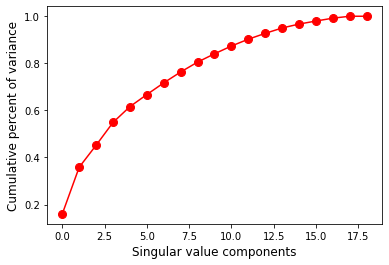

In [46]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=19)
latent_matrix = svd.fit_transform(tfidf_df)
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [47]:
n = 20
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=items.movie_title.tolist())

In [48]:
latent_matrix_1_df.shape

(1682, 19)

## 2. Collaborative Filtering
- Use user_movies_data

In [52]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_matrix_2 = svd.fit_transform(user_movies_data)
latent_matrix_2_df = pd.DataFrame(
                             latent_matrix_2, index=items.movie_title.tolist())

In [53]:
user_movies_data.shape

(1682, 943)

In [54]:
len(items.movie_title.tolist())

1682

In [50]:
latent_matrix_2_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
Toy Story (1995),61.469396,21.359470,-3.697670,-2.579255,22.229734,15.965819,12.771046,-2.750649,6.317186,0.425645,...,2.734692,3.014113,0.535003,-2.596753,0.308455,0.257710,0.761829,-0.636101,2.129572,2.154307
GoldenEye (1995),22.537180,1.719990,-13.616243,-0.514689,-6.448353,-2.408713,0.014409,-1.979776,-8.063039,-4.683453,...,-0.316463,-0.029177,1.503159,-0.351522,0.516572,2.002576,0.447947,-1.337537,-0.776953,0.512581
Four Rooms (1995),12.767067,7.006769,-2.535840,-7.766790,-0.696417,-4.604113,-0.299384,-2.450658,2.594063,-3.198470,...,-0.219871,0.536587,0.119294,0.814106,-0.843942,1.592177,0.712231,0.990840,-0.685821,0.621730
Get Shorty (1995),38.407419,-3.195162,-5.761061,-6.843529,-6.046999,-6.969560,-0.931458,3.538110,-5.464871,-6.086692,...,0.554257,0.210231,0.251879,-0.160117,-0.769172,0.079584,0.282027,-0.865936,-2.339070,-0.560623
Copycat (1995),13.842238,3.748584,-5.764236,-2.849087,-2.476795,-4.737294,-6.224758,0.061703,2.037491,5.640038,...,0.044779,-0.800376,1.543794,-0.466975,-1.152200,0.725288,-0.598493,-0.755150,-0.026750,-0.237679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mat' i syn (1997),0.009730,0.054860,0.058059,0.075857,-0.094315,-0.020940,0.021501,0.003021,0.021639,-0.005758,...,0.037965,0.022939,-0.017759,0.035937,0.040858,0.034525,-0.044620,-0.048478,0.012208,-0.023667
B. Monkey (1998),0.029189,0.164580,0.174176,0.227572,-0.282945,-0.062819,0.064502,0.009064,0.064918,-0.017275,...,0.113896,0.068818,-0.053276,0.107812,0.122573,0.103576,-0.133860,-0.145435,0.036624,-0.071002
Sliding Doors (1998),0.019459,0.109720,0.116117,0.151715,-0.188630,-0.041879,0.043001,0.006043,0.043278,-0.011517,...,0.075931,0.045878,-0.035517,0.071874,0.081715,0.069051,-0.089240,-0.096957,0.024416,-0.047335
You So Crazy (1994),0.212086,-0.025764,-0.098975,-0.012308,-0.071658,0.018906,-0.086135,0.047576,-0.173650,-0.001903,...,0.019526,0.040708,-0.073408,-0.260949,0.181477,0.173543,0.176491,-0.044697,0.023303,-0.085834


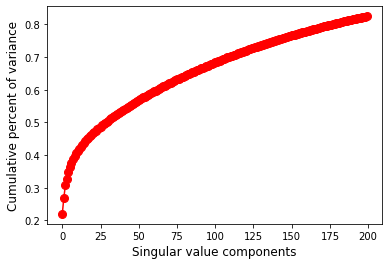

In [54]:
# plot variance expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()


In [55]:
from sklearn.metrics.pairwise import cosine_similarity
# take the latent vectors for a selected movie from both content 
# and collaborative matrixes
a_1 = np.array(latent_matrix_1_df.loc['Toy Story (1995)']).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc["Toy Story (1995)"]).reshape(1, -1)

# calculate the similartity of this movie with the others in the list
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

# an average measure of both content and collaborative 
hybrid = ((score_1 + score_2)/2.0)

# form a data frame of similar movies 
dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
# dictDf = {'collaborative': score_2} 
similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

#sort it on the basis of either: content, collaborative or hybrid, 
# here : content
similar.sort_values('content', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Aladdin and the King of Thieves (1996),1.000000,0.344467,0.672234
"Fox and the Hound, The (1981)",0.936967,0.396762,0.666864
Gumby: The Movie (1995),0.936967,0.122311,0.529639
Land Before Time III: The Time of the Great Giving (1995) (V),0.936967,0.179000,0.557983
"Swan Princess, The (1994)",0.936967,0.140415,0.538691
"Sword in the Stone, The (1963)",0.936967,0.415628,0.676297
Oliver & Company (1988),0.936967,0.245455,0.591211
Balto (1995),0.936967,0.182924,0.559946
"Aristocats, The (1970)",0.936967,0.339040,0.638003
Pinocchio (1940),0.936967,0.442430,0.689698


In [56]:
similar.sort_values('collaborative', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Star Wars (1977),-1.856154e-16,0.758525,0.379262
Independence Day (ID4) (1996),-1.283695e-16,0.722782,0.361391
Return of the Jedi (1983),-1.856154e-16,0.720234,0.360117
"Rock, The (1996)",-3.053113e-16,0.693185,0.346593
Mission: Impossible (1996),-4.232725e-16,0.678403,0.339201
Willy Wonka and the Chocolate Factory (1971),5.168978e-01,0.662681,0.589789
Star Trek: First Contact (1996),-3.209238e-16,0.655498,0.327749
Twister (1996),-3.053113e-16,0.652769,0.326385
Jerry Maguire (1996),5.334275e-17,0.646053,0.323027
Raiders of the Lost Ark (1981),-2.844947e-16,0.645178,0.322589


In [57]:
similar.sort_values('hybrid', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Aladdin (1992),0.820798,0.613207,0.717002
Pinocchio (1940),0.936967,0.442430,0.689698
"Sword in the Stone, The (1963)",0.936967,0.415628,0.676297
Aladdin and the King of Thieves (1996),1.000000,0.344467,0.672234
Beauty and the Beast (1991),0.752183,0.589947,0.671065
"Lion King, The (1994)",0.752183,0.583389,0.667786
"Fox and the Hound, The (1981)",0.936967,0.396762,0.666864
Winnie the Pooh and the Blustery Day (1968),0.936967,0.382180,0.659573
Beavis and Butt-head Do America (1996),0.818945,0.496274,0.657609
"Aristocats, The (1970)",0.936967,0.339040,0.638003


## 3. Hybrid Recommendation System

In [58]:
def recommend_similar_movies(title):
    # take the latent vectors for a selected movie from both content 
    # and collaborative matrixes
    a_1 = np.array(latent_matrix_1_df.loc[title]).reshape(1, -1)
    a_2 = np.array(latent_matrix_2_df.loc[title]).reshape(1, -1)

    # calculate the similartity of this movie with the others in the list
    score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
    score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

    # an average measure of both content and collaborative 
    hybrid = ((score_1 + score_2)/2.0)

    # form a data frame of similar movies 
    dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
    similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

    #sort it on the basis of either: content, collaborative or hybrid
    similar.sort_values('hybrid', ascending=False, inplace=True)

    print(similar[1:].head(11))

In [59]:
recommend_similar_movies("Toy Story (1995)")

                                              content  collaborative    hybrid
Aladdin (1992)                               0.820798       0.613207  0.717002
Pinocchio (1940)                             0.936967       0.442430  0.689698
Sword in the Stone, The (1963)               0.936967       0.415628  0.676297
Aladdin and the King of Thieves (1996)       1.000000       0.344467  0.672234
Beauty and the Beast (1991)                  0.752183       0.589947  0.671065
Lion King, The (1994)                        0.752183       0.583389  0.667786
Fox and the Hound, The (1981)                0.936967       0.396762  0.666864
Winnie the Pooh and the Blustery Day (1968)  0.936967       0.382180  0.659573
Beavis and Butt-head Do America (1996)       0.818945       0.496274  0.657609
Aristocats, The (1970)                       0.936967       0.339040  0.638003
James and the Giant Peach (1996)             0.752183       0.504453  0.628318


In [60]:
recommend_similar_movies("GoldenEye (1995)")

                                            content  collaborative    hybrid
Clear and Present Danger (1994)            1.000000       0.649864  0.824932
Rock, The (1996)                           1.000000       0.497224  0.748612
Waterworld (1995)                          0.843730       0.637212  0.740471
Die Hard 2 (1990)                          0.759103       0.706300  0.732702
Die Hard: With a Vengeance (1995)          0.759103       0.695859  0.727481
Highlander (1986)                          0.843730       0.609246  0.726488
Conan the Barbarian (1981)                 0.843730       0.594888  0.719309
Raiders of the Lost Ark (1981)             0.843730       0.586746  0.715238
Indiana Jones and the Last Crusade (1989)  0.843730       0.586680  0.715205
Chain Reaction (1996)                      1.000000       0.428825  0.714412
Hard Target (1993)                         0.822981       0.585880  0.704431


In [61]:
recommend_similar_movies("Mission: Impossible (1996)")

                                            content  collaborative    hybrid
Rock, The (1996)                           0.613562       0.769075  0.691318
Twister (1996)                             0.613562       0.751898  0.682730
Raiders of the Lost Ark (1981)             0.727201       0.597436  0.662319
Indiana Jones and the Last Crusade (1989)  0.727201       0.586007  0.656604
Con Air (1997)                             0.613562       0.602744  0.608153
Ghost and the Darkness, The (1996)         0.727201       0.484382  0.605792
Highlander (1986)                          0.727201       0.451392  0.589297
True Lies (1994)                           0.567384       0.602042  0.584713
Waterworld (1995)                          0.727201       0.441708  0.584455
Conan the Barbarian (1981)                 0.727201       0.429277  0.578239
Star Trek: First Contact (1996)            0.470058       0.673121  0.571589


## Turicreate - Python Library for easy recommendation engine building

In [64]:
    #! pip install turicreate

### Import the library

In [62]:
import turicreate

ModuleNotFoundError: No module named 'turicreate'

### Create a SFrame for training and testing data

In [63]:
train_data = turicreate.SFrame(ratings_train)
test_data = turicreate.SFrame(ratings_test)

NameError: name 'turicreate' is not defined

### Popularity Recommender - Cold Start problem

In [67]:
popularity_model = turicreate.popularity_recommender.create(train_data, user_id='user_id', item_id='movie_id', target='rating')

Warning: Ignoring columns unix_timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 90570 observations with 943 users and 1680 items.

Data prepared in: 0.124209s

90570 observations to process; with 1680 unique items.

### Recommend some top 5 movies to users 1, 2, 3, 4, 5
- Use Popularity model

In [68]:
popularity_recomm = popularity_model.recommend(users=[1,2,3,4,5],k=5)
popularity_recomm.print_rows(num_rows=25)

+---------+----------+-------+------+
| user_id | movie_id | score | rank |
+---------+----------+-------+------+
|    1    |   1599   |  5.0  |  1   |
|    1    |   1201   |  5.0  |  2   |
|    1    |   1189   |  5.0  |  3   |
|    1    |   1122   |  5.0  |  4   |
|    1    |   814    |  5.0  |  5   |
|    2    |   1599   |  5.0  |  1   |
|    2    |   1201   |  5.0  |  2   |
|    2    |   1189   |  5.0  |  3   |
|    2    |   1122   |  5.0  |  4   |
|    2    |   814    |  5.0  |  5   |
|    3    |   1599   |  5.0  |  1   |
|    3    |   1201   |  5.0  |  2   |
|    3    |   1189   |  5.0  |  3   |
|    3    |   1122   |  5.0  |  4   |
|    3    |   814    |  5.0  |  5   |
|    4    |   1599   |  5.0  |  1   |
|    4    |   1201   |  5.0  |  2   |
|    4    |   1189   |  5.0  |  3   |
|    4    |   1122   |  5.0  |  4   |
|    4    |   814    |  5.0  |  5   |
|    5    |   1599   |  5.0  |  1   |
|    5    |   1201   |  5.0  |  2   |
|    5    |   1189   |  5.0  |  3   |
|    5    | 

### Insights ??

- 
- 

### Item Similarity Recommender
#### Training the model

In [69]:
item_sim_model = turicreate.item_similarity_recommender.create(train_data, user_id='user_id', item_id='movie_id', target='rating', similarity_type='cosine')

Warning: Ignoring columns unix_timestamp;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 90570 observations with 943 users and 1680 items.

Data prepared in: 0.096887s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.313ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 13.576ms                            | 0.25             | 6               |

| 141.785ms                           | 100              | 1680            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.15791s

#### Making recommendations for users 1, 2, 3, 4, 5

In [70]:
item_sim_recomm = item_sim_model.recommend(users=[1,2,3,4,5],k=5)
item_sim_recomm.print_rows(num_rows=25)

+---------+----------+--------------------+------+
| user_id | movie_id |       score        | rank |
+---------+----------+--------------------+------+
|    1    |   423    | 0.9834008066708805 |  1   |
|    1    |   202    | 0.9495907992352056 |  2   |
|    1    |   655    | 0.7962183331260244 |  3   |
|    1    |   403    | 0.765623665037956  |  4   |
|    1    |   568    | 0.7511795292828829 |  5   |
|    2    |    50    | 1.1256258487701416 |  1   |
|    2    |   181    | 1.0651773168490484 |  2   |
|    2    |    7     | 0.9998190838557023 |  3   |
|    2    |   121    | 0.9225130241650802 |  4   |
|    2    |    9     | 0.831989913032605  |  5   |
|    3    |   313    | 0.6353766620159149 |  1   |
|    3    |   328    | 0.6032880300825293 |  2   |
|    3    |   315    | 0.5422587123784152 |  3   |
|    3    |   331    | 0.5355071858926252 |  4   |
|    3    |   332    | 0.5316696112806146 |  5   |
|    4    |    50    | 1.1311477082116264 |  1   |
|    4    |   288    | 1.048715

### Insights ?
- 
- 

# 4. Matrix Factorization Recommender

- R – The user-movie rating matrix
- K – Number of latent features
- alpha – Learning rate for stochastic gradient descent
- beta – Regularization parameter for bias
- iterations – Number of iterations to perform stochastic gradient descent


In [71]:
class MF():

    # Initializing the user-movie rating matrix, no. of latent features, alpha and beta.
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    # Initializing user-feature and movie-feature matrix 
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        # Stochastic gradient descent for given number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 20 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    # Computing total mean squared error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Ratings for user i and moive j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [72]:
R= np.array(ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0))

In [73]:
mf = MF(R, K=20, alpha=0.001, beta=0.01, iterations=100)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())
print()

Iteration: 20 ; error = 296.1428
Iteration: 40 ; error = 291.0942
Iteration: 60 ; error = 287.7374
Iteration: 80 ; error = 282.3564
Iteration: 100 ; error = 273.1316

P x Q:
[[3.92105461 3.36490957 2.9845237  ... 3.27366076 3.4351097  3.43152819]
 [3.94417182 3.30137547 3.16908257 ... 3.37287006 3.51702066 3.49947715]
 [3.3759181  2.7003567  2.61436327 ... 2.78033145 2.90381586 2.90484641]
 ...
 [4.26196805 3.66159871 3.44827559 ... 3.63185631 3.77754697 3.74272589]
 [4.38492385 3.78049366 3.52312126 ... 3.79092683 3.89080227 3.86524256]
 [3.79231176 3.23934483 3.03230513 ... 3.25970117 3.38211532 3.25664447]]



## Surprise

In [74]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [75]:
ratings

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [76]:
items

,movie_id,movie_title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,metadata_Film-Noir,metadata_Horror,metadata_Musical,metadata_Mystery,metadata_Romance,metadata_Sci-Fi,metadata_Thriller,metadata_War,metadata_Western,full_metadata
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,,,,,,,,,,Animation Children's Comedy ...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,,,,,,,Thriller,,,Action Adventure ...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,,,,,,,Thriller,,,Thriller
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,,,,,,,,,,Action Comedy Drama ...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,,,,,,,Thriller,,,Crime Drama Thr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,,,,,,,,,,Drama
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,,,,,Romance,,Thriller,,,Romance Thrille...
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,,,,,Romance,,,,,Drama Romance
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,,,,,,,,,,Comedy


In [77]:
Mapping_file = dict(zip(items.movie_title.tolist(), items.movie_id.tolist()))

In [78]:
# instantiate a reader and read in our rating data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id','movie_id','rating']], reader)

# train SVD on 75% of known rates
trainset, testset = train_test_split(data, test_size=.25)
algorithm = SVD()
algorithm.fit(trainset)
predictions = algorithm.test(testset)

# check the accuracy using Root Mean Square Error
accuracy.rmse(predictions)

RMSE: 0.9451


0.9450751062977039

In [79]:
def pred_user_rating(ui):
    if ui in ratings.user_id.unique():
        ui_list = ratings[ratings.user_id == ui].movie_id.tolist()
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}        
        predictedL = []
        for i, j in d.items():     
            predicted = algorithm.predict(ui, j)
            predictedL.append((i, predicted[3])) 
        pdf = pd.DataFrame(predictedL, columns = ['movies', 'ratings'])
        pdf.sort_values('ratings', ascending=False, inplace=True)  
        pdf.set_index('movies', inplace=True)    
        return pdf.head(10)        
    else:
        print("User Id does not exist in the list!")
        return None

In [80]:
user_id = 1
pred_user_rating(user_id)

,ratings
movies,
Wings of Desire (1987),4.726772
Chinatown (1974),4.655911
"Close Shave, A (1995)",4.652174
Waiting for Guffman (1996),4.619470
Ran (1985),4.591864
Casablanca (1942),4.547010
"Boot, Das (1981)",4.462583
"Third Man, The (1949)",4.462502
"Killing Fields, The (1984)",4.452708


In [81]:
pred_user_rating(50)

,ratings
movies,
"Godfather, The (1972)",4.613636
"Silence of the Lambs, The (1991)",4.570185
"Godfather: Part II, The (1974)",4.547845
Raging Bull (1980),4.542233
Casablanca (1942),4.520886
"Wrong Trousers, The (1993)",4.427827
"Close Shave, A (1995)",4.427066
"Manchurian Candidate, The (1962)",4.410475
"Boot, Das (1981)",4.389995


In [82]:
pred_user_rating(49)

,ratings
movies,
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),4.179254
Secrets & Lies (1996),4.080494
12 Angry Men (1957),3.905257
"Boot, Das (1981)",3.847671
"Godfather, The (1972)",3.832041
Rear Window (1954),3.804380
Strictly Ballroom (1992),3.804347
"Close Shave, A (1995)",3.804085
To Kill a Mockingbird (1962),3.788469


In [83]:
pred_user_rating(1)

,ratings
movies,
Wings of Desire (1987),4.726772
Chinatown (1974),4.655911
"Close Shave, A (1995)",4.652174
Waiting for Guffman (1996),4.619470
Ran (1985),4.591864
Casablanca (1942),4.547010
"Boot, Das (1981)",4.462583
"Third Man, The (1949)",4.462502
"Killing Fields, The (1984)",4.452708


In [84]:
pred_user_rating(915)

,ratings
movies,
"Usual Suspects, The (1995)",4.267505
"Shawshank Redemption, The (1994)",4.247665
Pulp Fiction (1994),4.244646
Wallace & Gromit: The Best of Aardman Animation (1996),4.155187
"Manchurian Candidate, The (1962)",4.127605
Some Folks Call It a Sling Blade (1993),4.126187
"Close Shave, A (1995)",4.118404
Vertigo (1958),4.115630
12 Angry Men (1957),4.108518
